# Competition Description

> Indented block




Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.


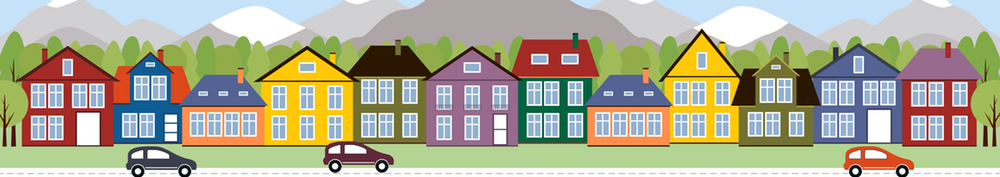



With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


#### Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

#### Acknowledgments

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

#### Data can be downloaded from here
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#### Importing Data

#### Overview


 Importing the data.

*   Data Analysis
*   Feature Engineering
*   Feature Scaling
*   Feature Selection
*   Straightified Sampling
*   Model Prediction
*   Summery



In [ ]:
#from google.colab import files
#uploaded= files.upload()

In [ ]:
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")


#drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

#df= pd.read_csv(io.StringIO(uploaded['advance'].decode('utf-8')))
df=pd.read_csv("/content/advance_house_prediction.csv")
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [ ]:
print(df.shape)

(1460, 81)


### Data Analysis

In Data analysis we will analyse to find out the below stuff

1. Missing values
2. All the Numerical variables
3. Distribution of the numerical variables
4. Categorical variables
5. Cardinality of categorical variables
6. Outliers
7. Relationship between independent and dependent feature(Sale price)

### Missing values

In [ ]:
features_with_missingval= [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_missingval:
    print(feature , np.round(df[feature].isnull().mean(), 4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.0055
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


###  Now we will look for the relation between missing values and sale price

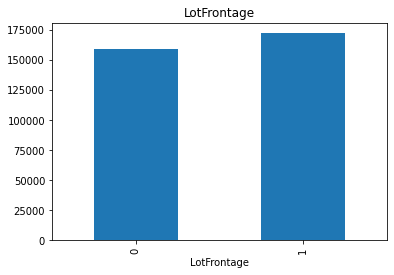

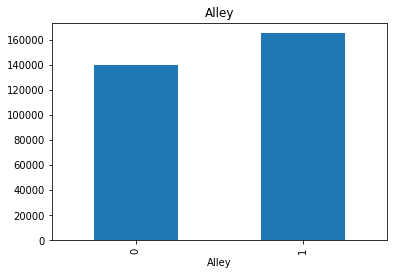

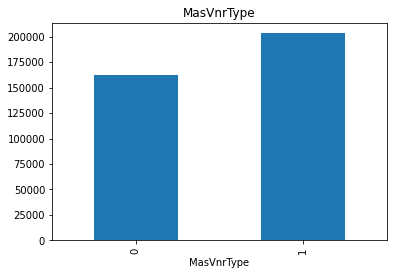

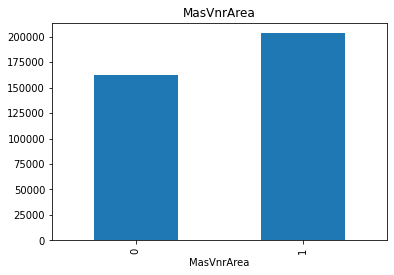

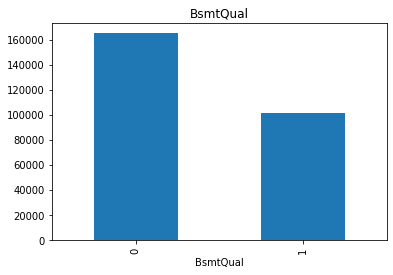

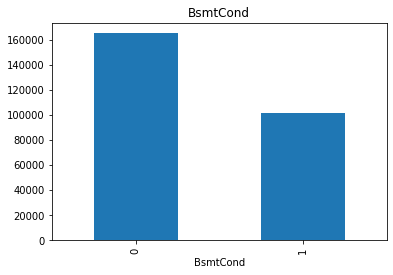

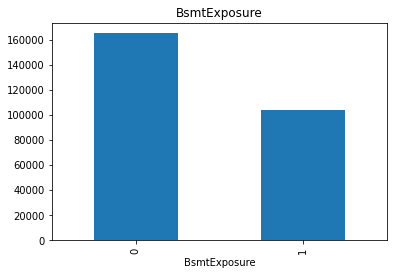

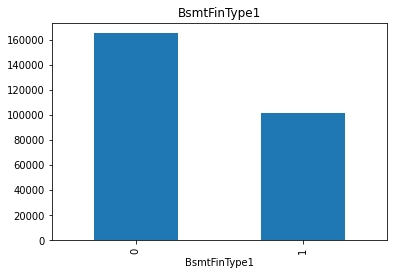

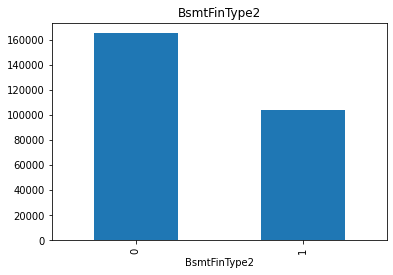

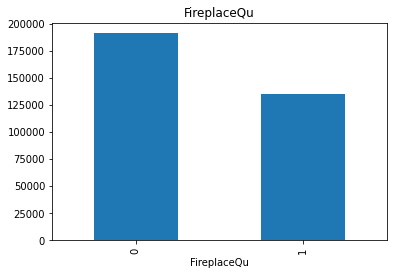

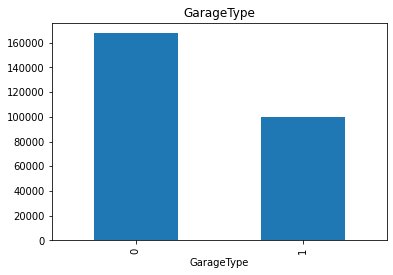

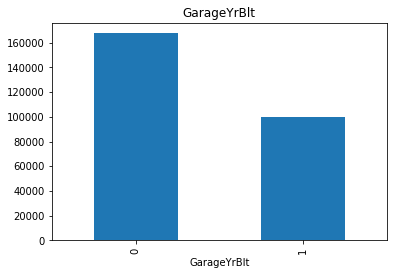

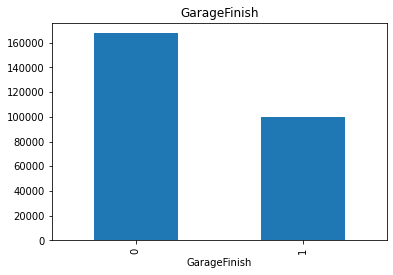

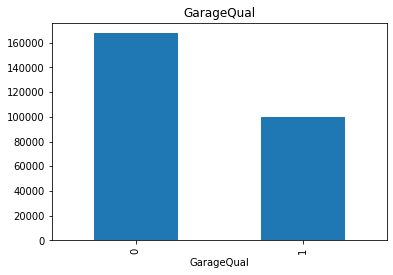

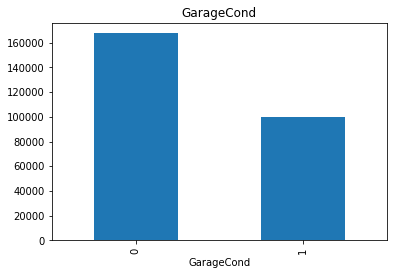

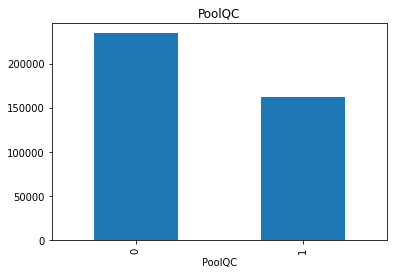

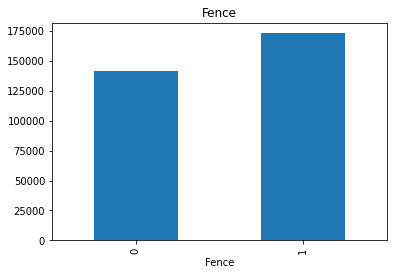

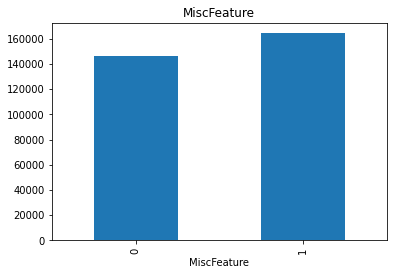

In [ ]:
for feature in features_with_missingval:
    df_rdf= df.copy()
    
    # let's make features as 1 which have missing value and 0 as not having missing value
    df_rdf[feature]= np.where(df_rdf[feature].isnull(), 1, 0)
    # Now Let's calculate the mean sale price where the information is missing 
    df_rdf.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    
    

So here the relation between the missing values and the dependent variable is clearly making an impact. Some feature's missng value resulting in higher the sale price and in some feature lower the sale price. We need to replace these values with some meaningful which we will see in feature engineering.

### Numerical variable

In [ ]:
# List of numerical varible
numerical_features= [features for features in df.columns if df[features].dtypes!= 'O']
print("Total no. of numerical features: ", len(numerical_features))
df[numerical_features].head()

Total no. of numerical features:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

##### Temporal variables
There are some features which are not in use but in the dataset. like YearSold, YearBuilt etc. we have to take care of it, if not important then we will remove it.

In [ ]:
year_infeature= [feature for feature in numerical_features if 'Year' in feature or "Yr" in feature] 
year_infeature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
# let's explore the year data
for feature in year_infeature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

So here we got the data about the year. Now we will look further whether this data have relation with SalePrice or not.

Text(0.5, 1.0, 'House Price vs YearSold')

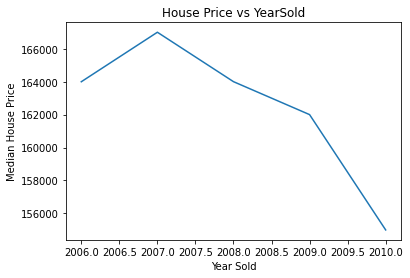

In [ ]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

Here we can see that with respect to time the house price is decreasing, this is looking little undigestible. So we will look for further analysis

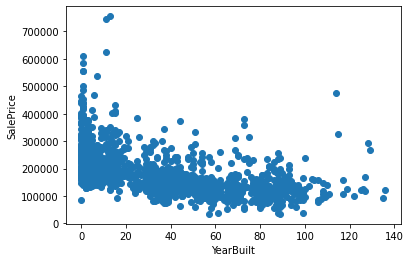

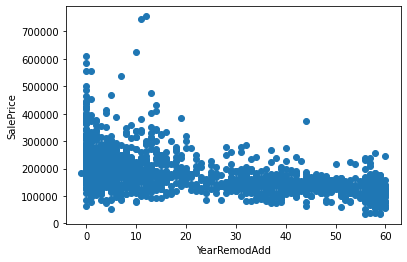

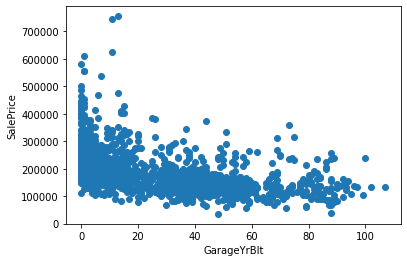

In [ ]:
# Here we will compare the difference between all year feature with SalePrice

for feature in year_infeature:
    if feature !="YrSold":
        df_rdf= df.copy()
        ## we will look for the difference betwwn the year variable and year sold
        df_rdf[feature]= df_rdf['YrSold'] - df_rdf[feature]
        plt.scatter(df_rdf[feature], df_rdf['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

So here we can see the first graph of salePrice vs YearBuilt that if the building is old then the sale price is very low and high if the building is new. same trend is there in all the graphs.  

In [ ]:
# There are two types of Numerical variables on continuity
# Continuous and Discrete variable
# I am using 25 as threshold value for discrete 
discrete_feature= [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_infeature +['Id']]
print("Discrete Variable Count: {}".format(len(discrete_feature)))


Discrete Variable Count: 17


In [ ]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
df[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

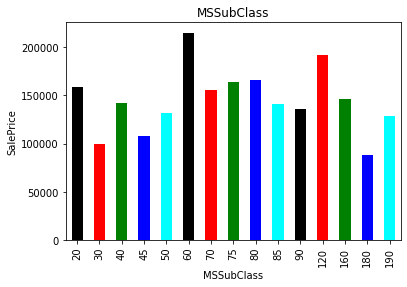

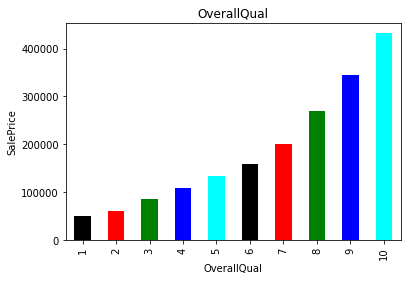

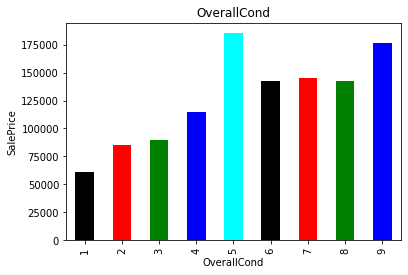

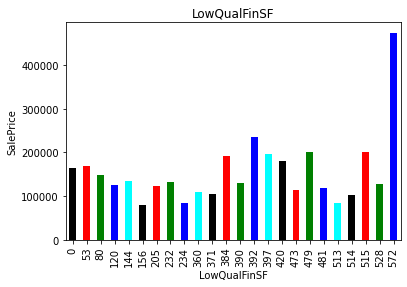

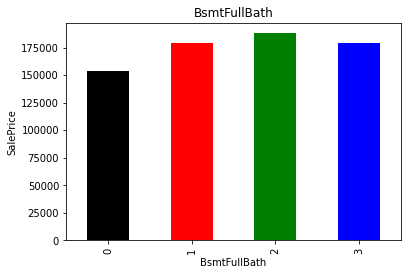

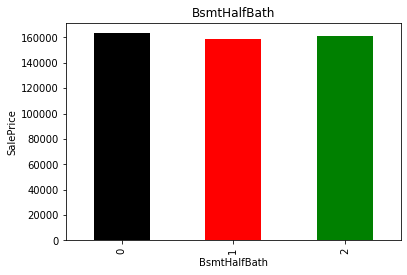

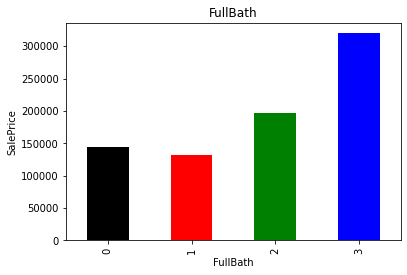

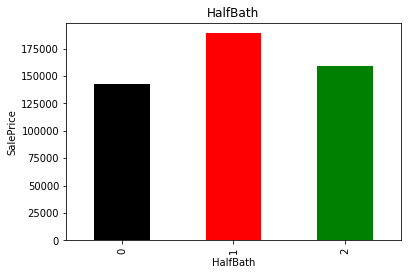

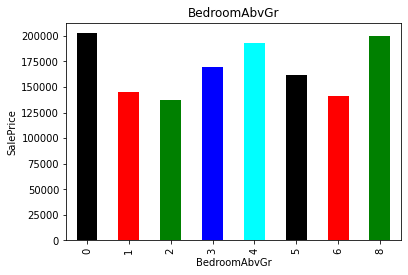

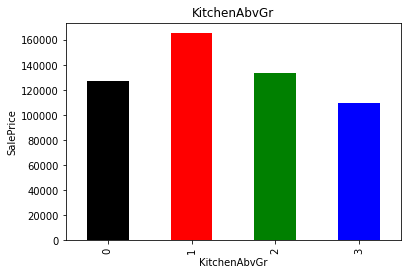

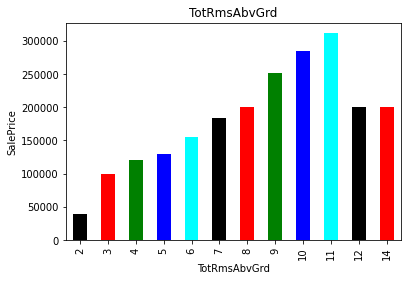

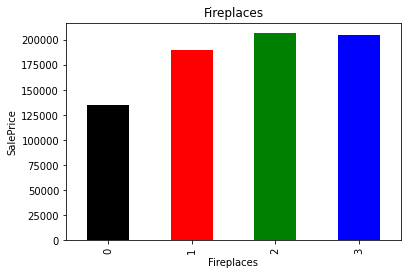

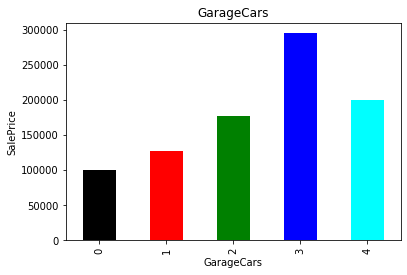

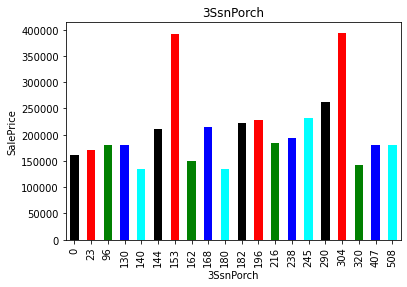

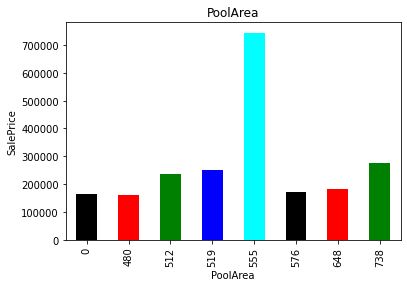

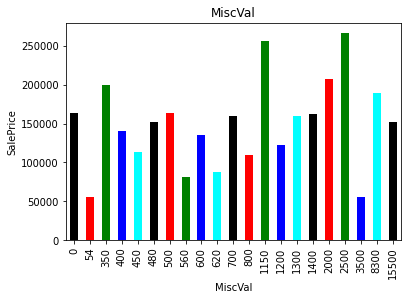

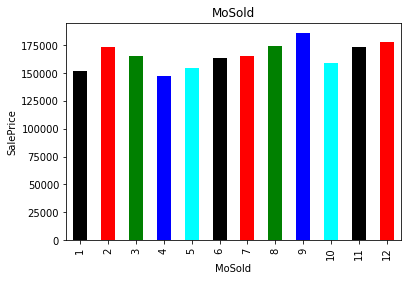

In [ ]:
# We will find relation between them and salePrice

for feature in discrete_feature:
    df_rdf= df.copy()
    df_rdf.groupby(feature)['SalePrice'].median().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

This is showing there is relation between discrete variables and sale Price

### Continuous variable

In [ ]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+ year_infeature + ['Id']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 16


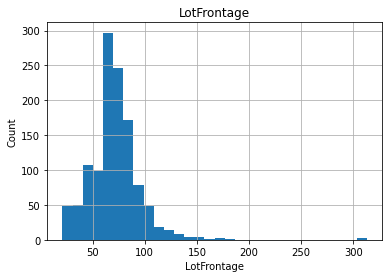

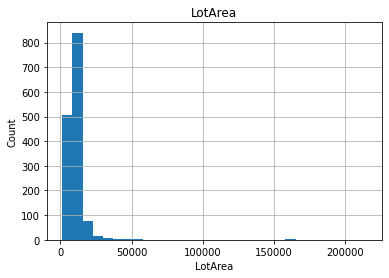

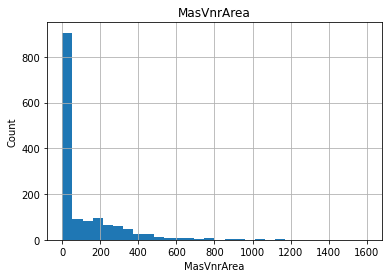

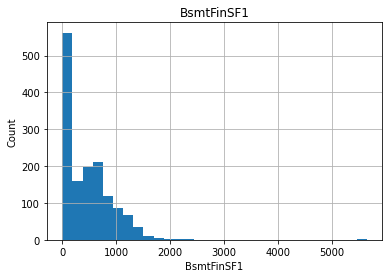

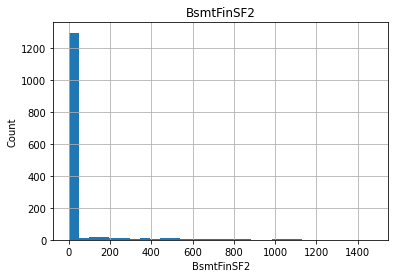

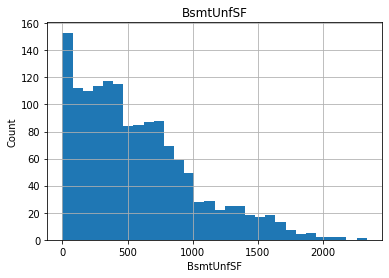

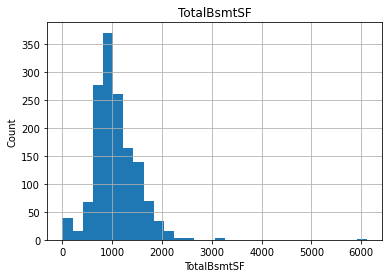

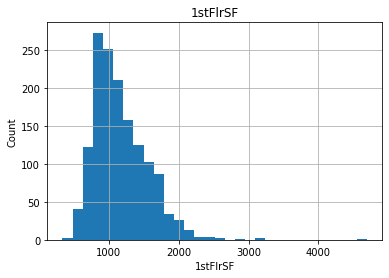

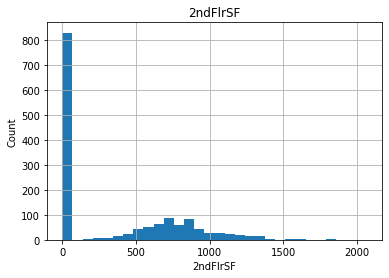

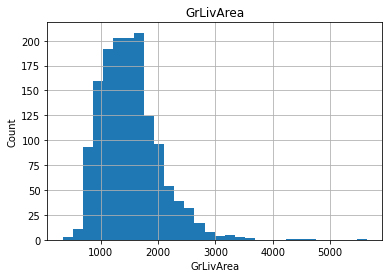

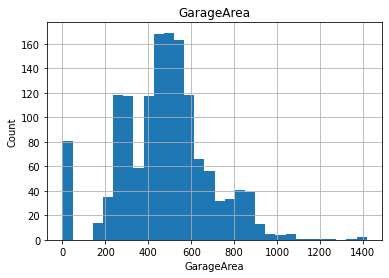

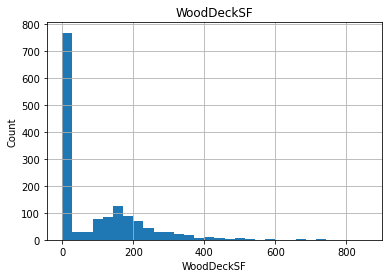

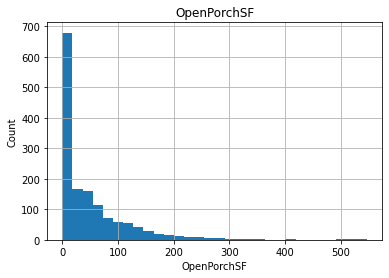

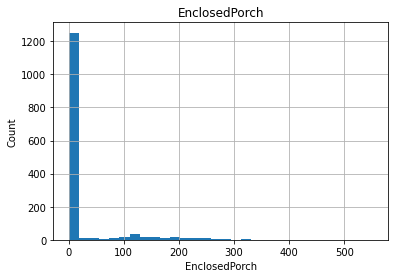

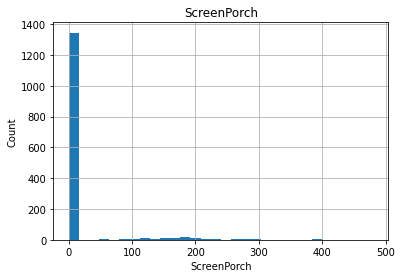

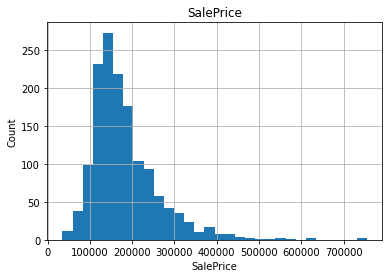

In [ ]:
# Let's analyse the continuous value by creating histogram to understand the distribution

for feature in continuous_features:
    df_rdf= df.copy()
    df_rdf[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


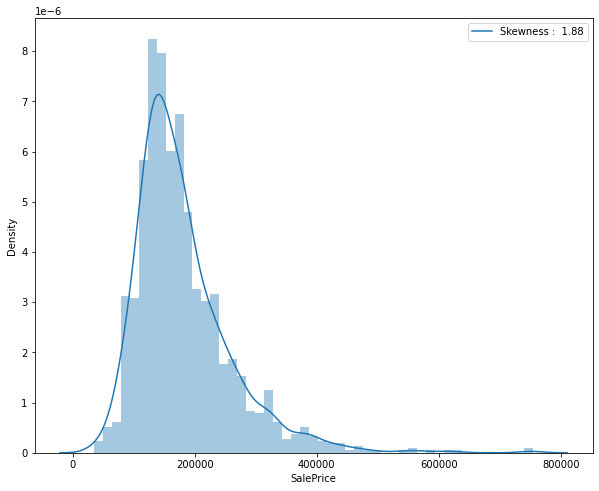

In [ ]:
plt.figure(figsize=(10,8))
bar=sns.distplot(df_rdf["SalePrice"])
bar.legend(["Skewness : {: 0.2f}".format(df_rdf["SalePrice"].skew())])

 distribution is skewed in the graph

In [ ]:
high_corr=df_rdf.corr()
high_corr_features= high_corr.index[abs(high_corr['SalePrice'])>=0.5]
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

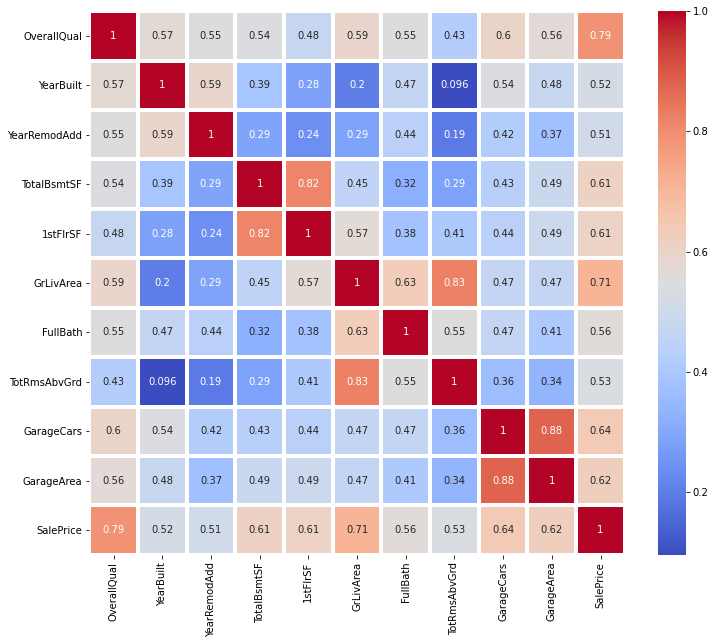

In [ ]:
plt.figure(figsize=(12,10))
ax= sns.heatmap(df_rdf[high_corr_features].corr(), cmap= "coolwarm",annot=True, linewidth=3)

*   OverallQuality is related 79% to sale price
*   GrlivingArea is related to 71% to sale price
*   GarageCars is related to 64% to sale price
*   GarageArea is related to 62% to sale price
*   1st floor Surface is related 61% to sale price
*   Total basement surface is related to 61% to sale price
*   Fullbath is related to 53% to sale price
*   YearRemodAdd is related to 51% to sale price
*   YearBuilt is related to 52% to sale price

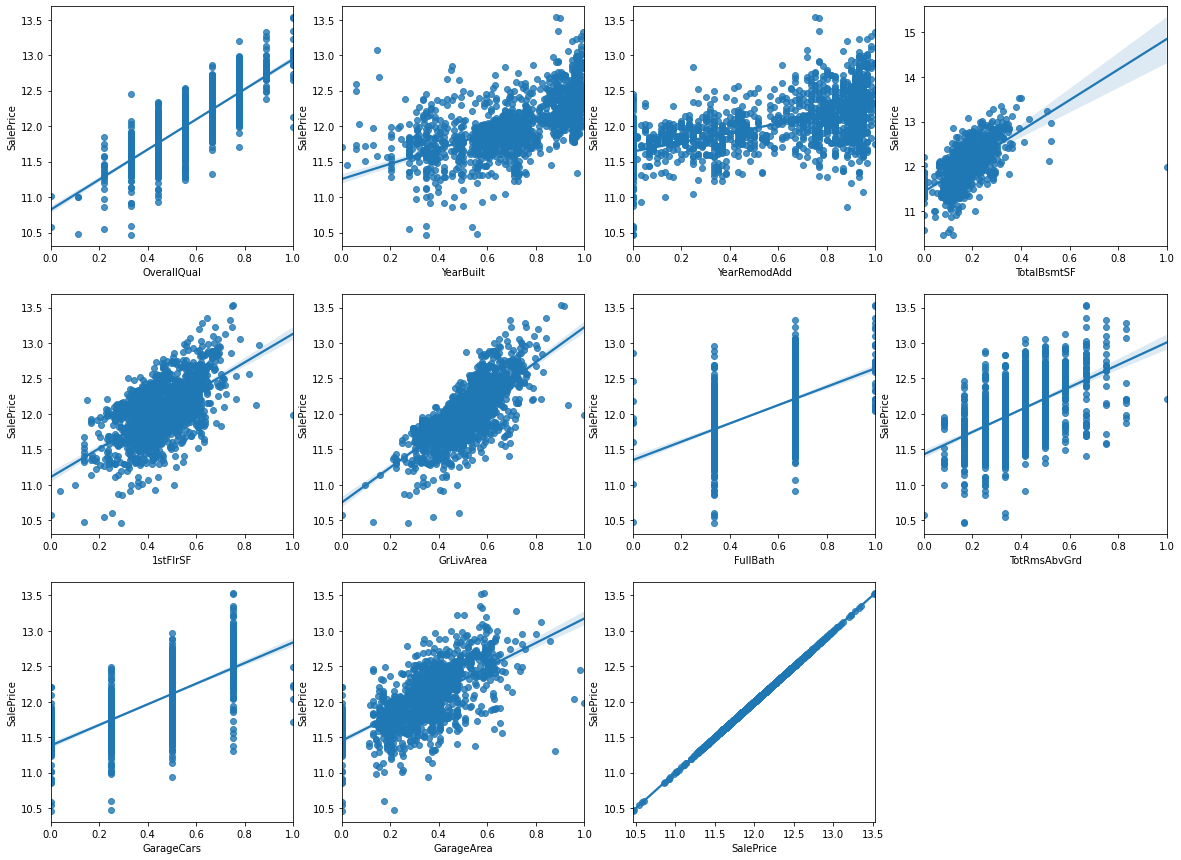

In [ ]:
plt.figure(figsize=(20,15))
for i in range(len(high_corr_features)):
    if i<=10:
        plt.subplot(3,4,i+1)
#         plt.subplot_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(data=df_rdf, x= high_corr_features[i], y="SalePrice")

Data is in almost in linear format in every graph. So from here we can conclude that if we do a good feature engineering then Linear Regression will be a good start.


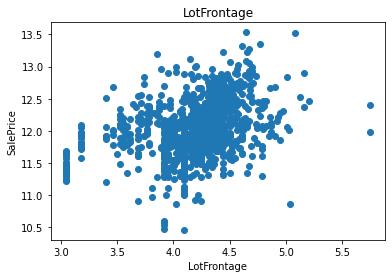

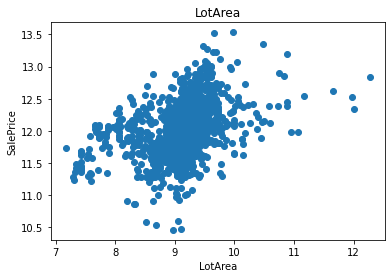

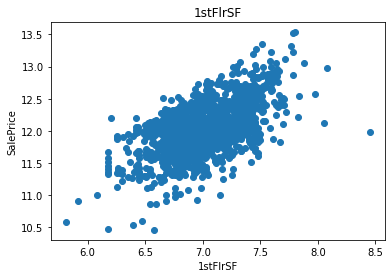

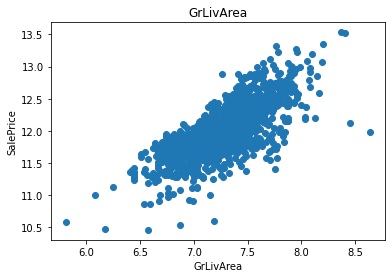

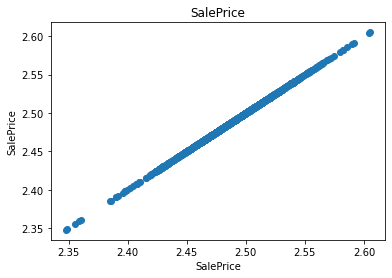

In [ ]:
# Here we will use logarithmic transformation

for feature in continuous_features:
    df_rdf=df.copy()
    if 0 in df_rdf[feature].unique():
        pass
    else:
        df_rdf[feature]= np.log(df_rdf[feature])
        df_rdf['SalePrice']= np.log(df_rdf['SalePrice'])
        plt.scatter(df_rdf[feature], df_rdf['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

###  Outliers

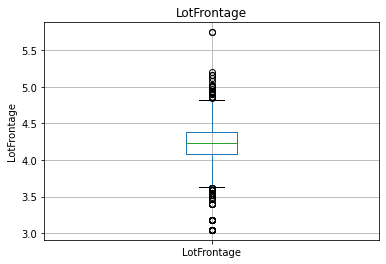

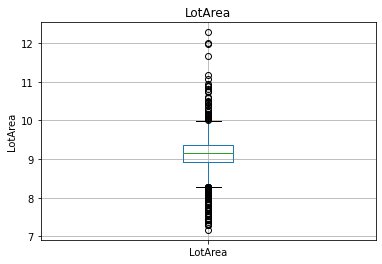

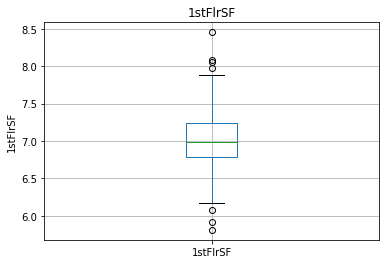

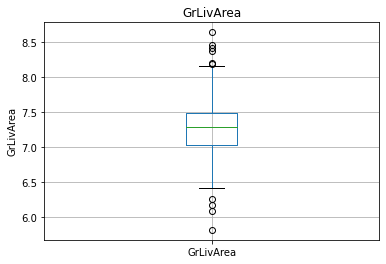

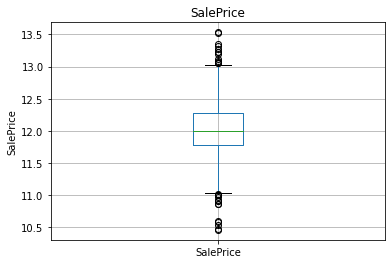

In [ ]:
for feature in continuous_features:
    df_rdf=df.copy()
    if 0 in df_rdf[feature].unique():
        pass
    else:
        df_rdf[feature]= np.log(df_rdf[feature])
        df_rdf.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

### Categorical Variable

In [ ]:
categorical_features= [feature for feature in df.columns if df_rdf[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
df[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [ ]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature, len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

We can see a lot of categorical features are here now we will look for relation between categorical variable and dependent variable SalePrice.

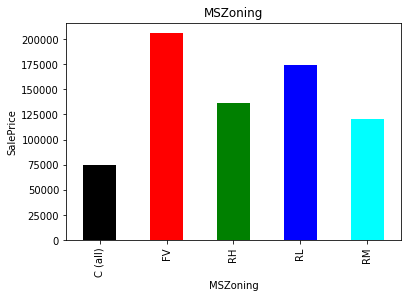

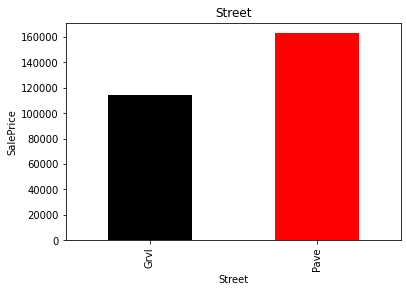

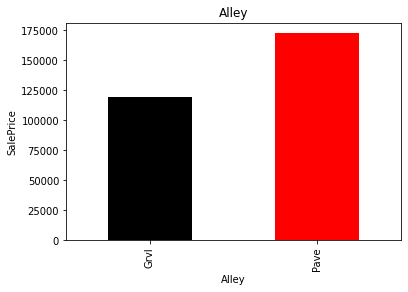

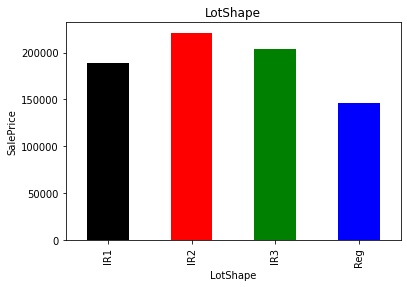

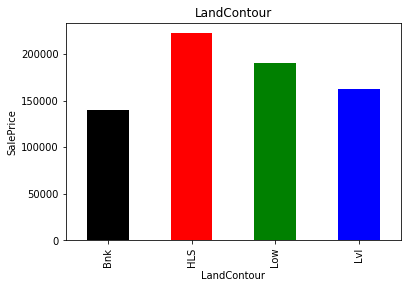

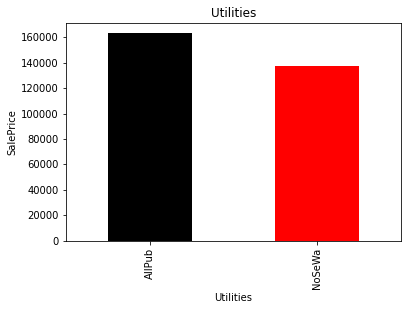

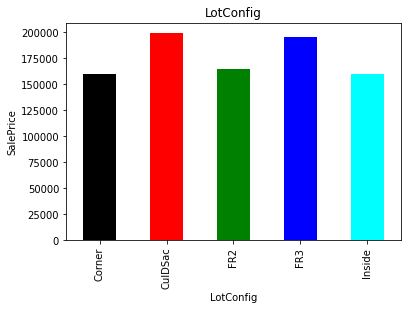

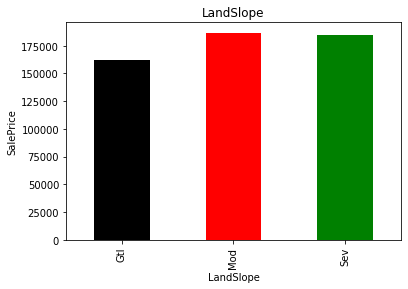

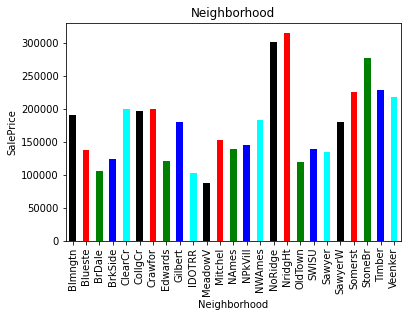

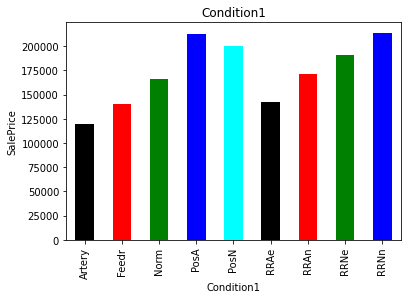

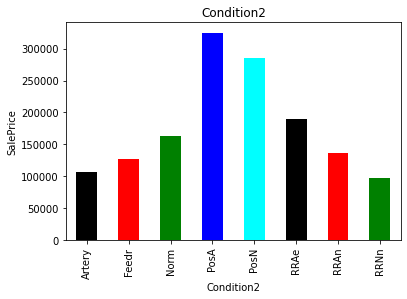

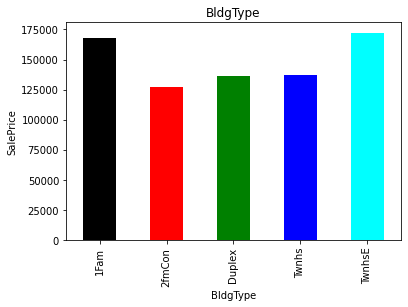

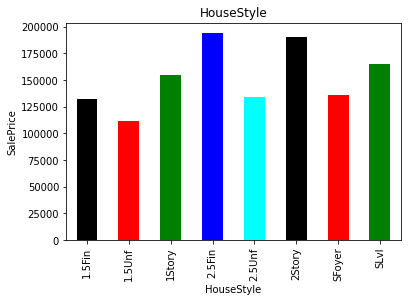

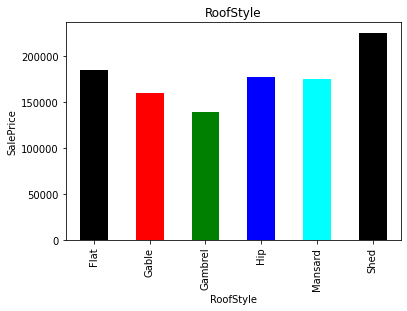

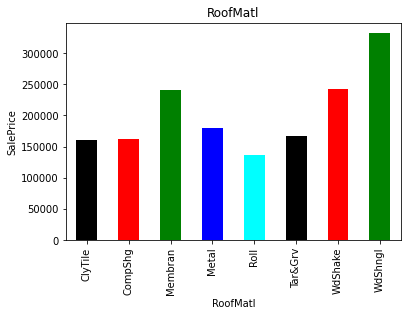

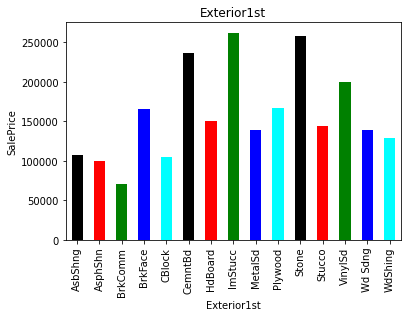

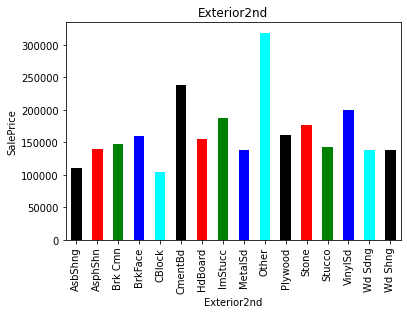

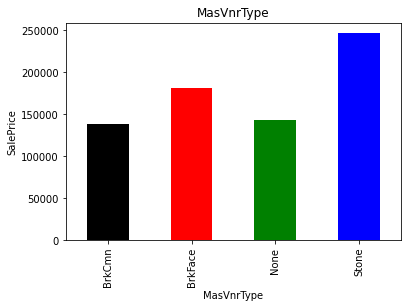

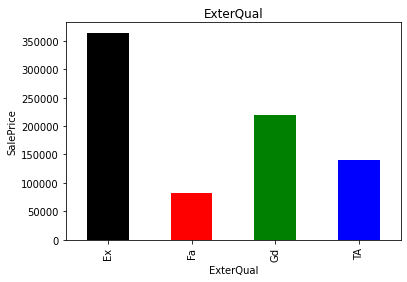

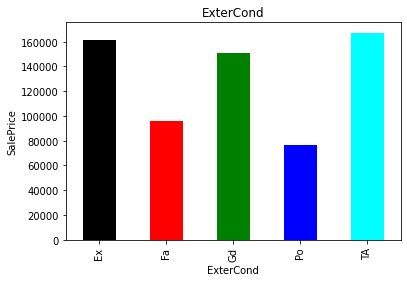

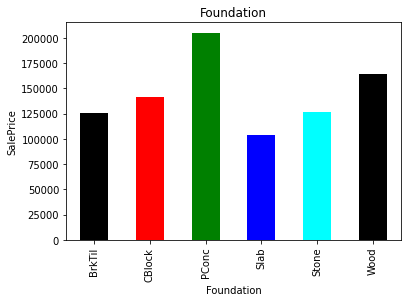

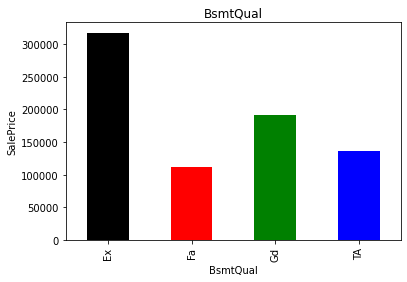

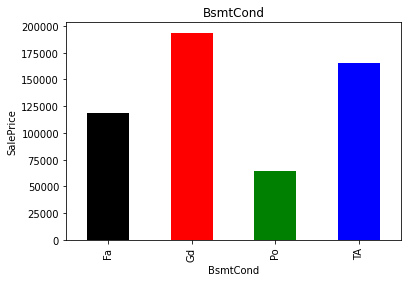

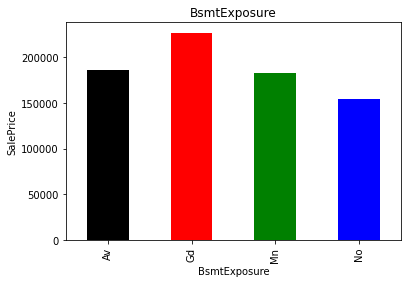

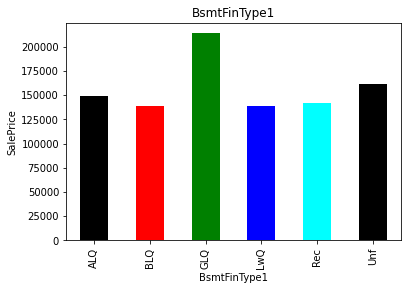

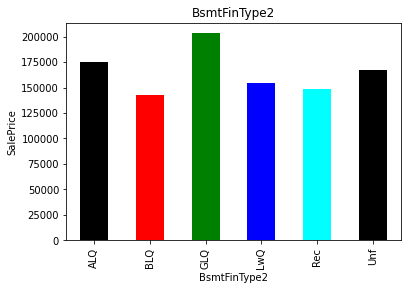

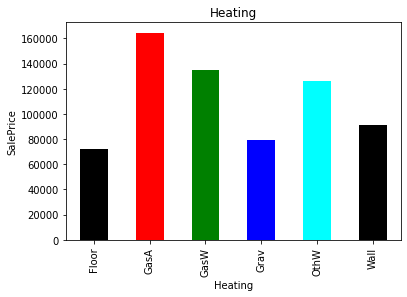

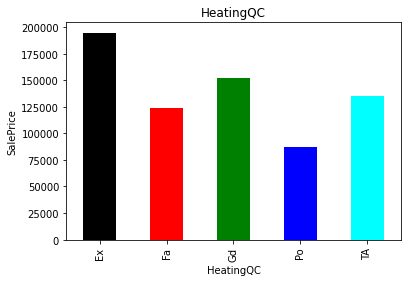

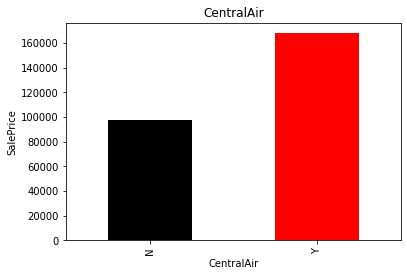

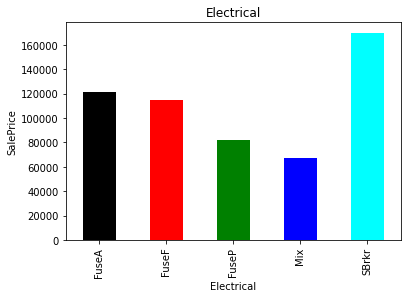

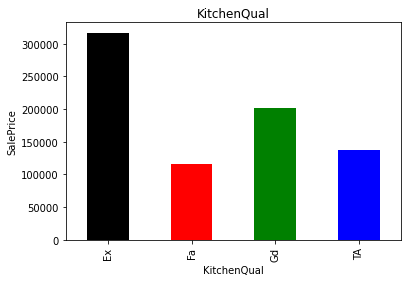

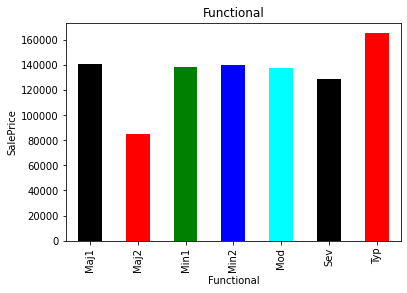

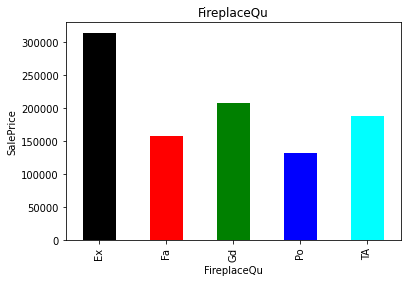

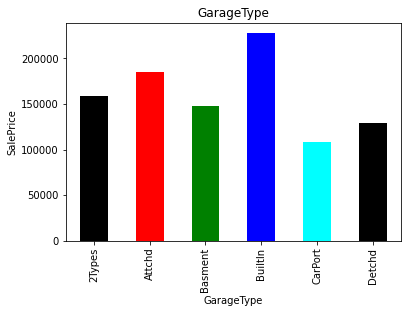

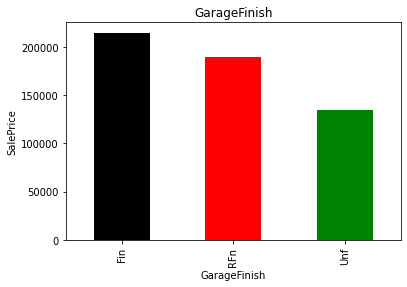

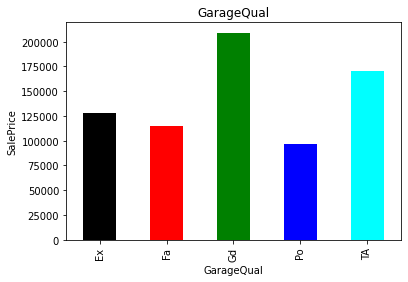

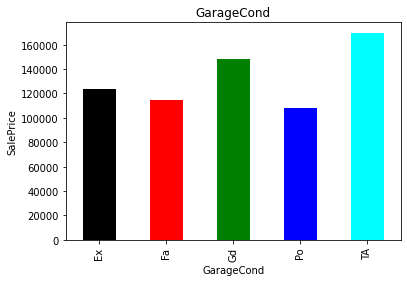

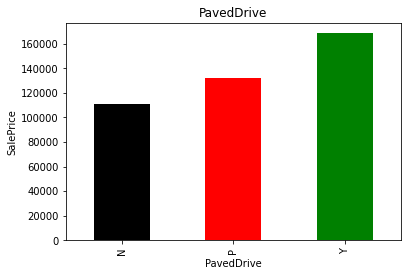

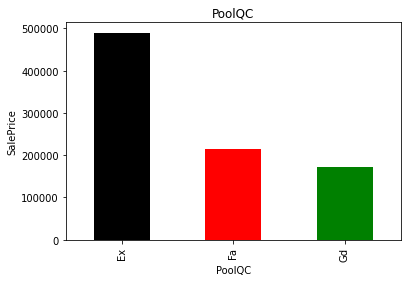

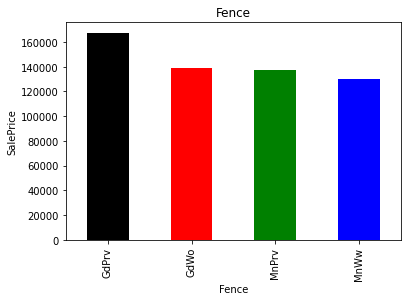

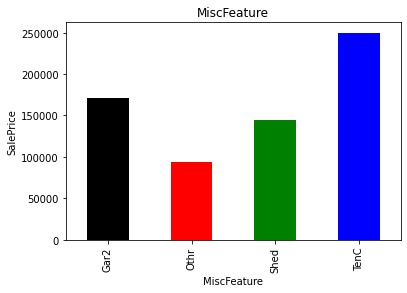

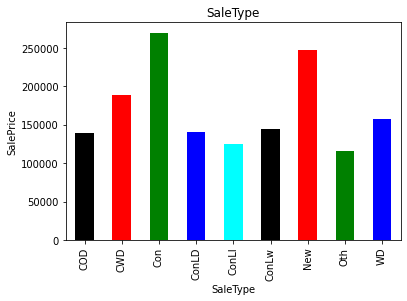

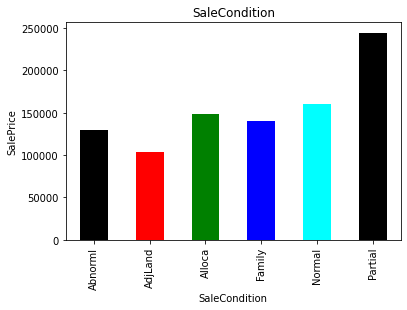

In [ ]:
for feature in categorical_features:
    df_rdf=df.copy()
    df_rdf.groupby(feature)['SalePrice'].median().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

So from from this we can see that the data is correlated to each other

### Feature Engineering

In [ ]:
# there is always a chance to data leak so we will split data then apply feature engineering.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df, df["SalePrice"], test_size=0.1, random_state=0) 


In [ ]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

### Missing Values

In [ ]:
# Let's find all the nan values
nan_features= [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype=='O']
for feature in nan_features:
    print("{}: {}% missing values".format(feature, np.round(df[feature].isnull().mean(), 4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


PoolQC, Alley, Fence, Misfeature, FirePlaceQu have the largest missing values.

In [ ]:
# replaceing missing cvalue with the new label
def replace_cat_feature(df, nan_featurea):
    df_rdf=df.copy()
    df_rdf[nan_features]= df_rdf[nan_features].fillna('Missing')
    return df_rdf
df= replace_cat_feature(df, nan_features)
df[nan_features].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [ ]:
# now let's do the same for Numerical variables nan values
nan_numerical=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!="O"]

# now print the numerical variables with nan values with their percentage
for feature in nan_numerical:
    print("{}: {}% missing values".format(feature, np.around(df[feature].isnull().mean(), 4)))

LotFrontage: 0.1774% missing values
MasVnrArea: 0.0055% missing values
GarageYrBlt: 0.0555% missing values


In [ ]:
# Replacing the numerical missing value
for feature in nan_numerical:
    # here we will replace this with median because ther are outliers
    median_val= df[feature].median()
    #create a new feature to capture nan values
    df[feature + 'nan']= np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_val, inplace =True)
    
df[nan_numerical].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
df.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   
16  17          20       RL         69.0    11241   Pave  Missing      IR1   
17  18          90       RL         72.0    10791   Pave  Missing      Reg   
18  19          20       RL         66.0    13695   Pave  Missing      Reg   
19  20          20       RL         70.0     7560   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story     

In [ ]:
# Temporal variables
for features in ['YearBuilt', 'YearRemodAdd','GarageYrBlt']:
    df[feature]=df['YrSold']- df[feature]

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [ ]:
df[['YearBuilt', 'YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0       2003          2003          5.0
1       1976          1976         31.0
2       2001          2002          7.0
3       1915          1970          8.0
4       2000          2000          8.0

### Numerical Variable
Since the numerical variqables are skewed we will perform log normal distribution

In [ ]:
num_features=['LotFrontage', 'LotArea', "1stFlrSF", 'GrLivArea', 'SalePrice']
for feature in num_features:
    df[feature]=np.log(df[feature])

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

### Handling rare categorical features

In [ ]:
categorical_features= [feature for feature in df.columns if df[feature].dtype=='O']

In [ ]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in categorical_features:
    temp= df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]= np.where(df[feature].isin(temp_df), df[feature],'Rare_variable')

In [ ]:
df.head(40)

Id  MSSubClass       MSZoning  LotFrontage   LotArea Street    Alley  \
0    1          60             RL     4.174387  9.041922   Pave  Missing   
1    2          20             RL     4.382027  9.169518   Pave  Missing   
2    3          60             RL     4.219508  9.328123   Pave  Missing   
3    4          70             RL     4.094345  9.164296   Pave  Missing   
4    5          60             RL     4.430817  9.565214   Pave  Missing   
5    6          50             RL     4.442651  9.554993   Pave  Missing   
6    7          20             RL     4.317488  9.218705   Pave  Missing   
7    8          60             RL     4.234107  9.247829   Pave  Missing   
8    9          50             RM     3.931826  8.719317   Pave  Missing   
9   10         190             RL     3.912023  8.911934   Pave  Missing   
10  11          20             RL     4.248495  9.323669   Pave  Missing   
11  12          60             RL     4.442651  9.386308   Pave  Missing   
12  13          20             RL     4.234107  9.470240   Pave  Missing   
13  14          20             RL     4.510860  9.273503   Pave  Missing   
14  15          20             RL     4.234107  9.298351   Pave  Missing   
15  16          45             RM     3.931826  8.719317   Pave  Missing   
16  17          20             RL     4.234107  9.327323   Pave  Missing   
17  18          90             RL     4.276666  9.286468   Pave  Missing   
18  19          20             RL     4.189655  9.524786   Pave  Missing   
19  20          20             RL     4.248495  8.930626   Pave  Missing   
20  21          60             RL     4.615121  9.562053   Pave  Missing   
21  22          45             RM     4.043051  8.915835   Pave     Grvl   
22  23          20             RL     4.317488  9.184202   Pave  Missing   
23  24         120             RM     3.784190  8.348538   Pave  Missing   
24  25          20             RL     4.234107  9.017484   Pave  Missing   
25  26          20             RL     4.700480  9.563108   Pave  Missing   
26  27          20             RL     4.094345  8.881836   Pave  Missing   
27  28          20             RL     4.584967  9.348187   Pave  Missing   
28  29          20             RL     3.850148  9.700208   Pave  Missing   
29  30          30             RM     4.094345  8.752107   Pave  Missing   
30  31          70  Rare_variable     3.912023  9.047821   Pave     Pave   
31  32          20             RL     4.234107  9.052985   Pave  Missing   
32  33          20             RL     4.442651  9.310095   Pave  Missing   
33  34          20             RL     4.248495  9.264071   Pave  Missing   
34  35         120             RL     4.094345  8.897409   Pave  Missing   
35  36          60             RL     4.682131  9.504352   Pave  Missing   
36  37          20             RL     4.718499  9.292750   Pave  Missing   
37  38          20             RL     4.304065  9.051579   Pave  Missing   
38  39          20             RL     4.219508  8.977399   Pave  Missing   
39  40          90             RL     4.174387  8.706159   Pave  Missing   

   LotShape LandContour Utilities LotConfig LandSlope   Neighborhood  \
0       Reg         Lvl    AllPub    Inside       Gtl        CollgCr   
1       Reg         Lvl    AllPub       FR2       Gtl  Rare_variable   
2       IR1         Lvl    AllPub    Inside       Gtl        CollgCr   
3       IR1         Lvl    AllPub    Corner       Gtl        Crawfor   
4       IR1         Lvl    AllPub       FR2       Gtl        NoRidge   
5       IR1         Lvl    AllPub    Inside       Gtl        Mitchel   
6       Reg         Lvl    AllPub    Inside       Gtl        Somerst   
7       IR1         Lvl    AllPub    Corner       Gtl         NWAmes   
8       Reg         Lvl    AllPub    Inside       Gtl        OldTown   
9       Reg         Lvl    AllPub    Corner       Gtl        BrkSide   
10      Reg         Lvl    AllPub    Inside       Gtl         Sawyer   
11      IR1         Lvl

In [ ]:
for feature in categorical_features:
    labels_ordered= df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]= df[feature].map(labels_ordered)

In [ ]:
df.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   
5   6          50         3     4.442651  9.554993       1      2         1   
6   7          20         3     4.317488  9.218705       1      2         0   
7   8          60         3     4.234107  9.247829       1      2         1   
8   9          50         1     3.931826  8.719317       1      2         0   
9  10         190         3     3.912023  8.911934       1      2         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   
5            1          1          0          0             9           2   
6            1          1          0          0            18           2   
7            1          1          1          0            12           5   
8            1          1          0          0             4           0   
9            1          1          1          0             3           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5       2003   
1           1         3           3            6            8       1976   
2           1         3           5            7            5       2001   
3           1         3           5            7            5       1915   
4           1         3           5            8            5       2000   
5           1         3           1            5            5       1993   
6           1         3           3            8            5       2004   
7           1         3           5            7            6       1973   
8           1         3           1            7            5       1931   
9           0         0           2            5            6       1939   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          0         0           10           10           2   
1          1976          0         0            4            3           1   
2          2002          0         0           10           10           2   
3          1970          0         0            2            4           1   
4          2000          0         0           10           10           2   
5          1995          0         0           10           10           1   
6          2005          0         0           10           10           4   
7          1973          0         0            6            5           4   
8          1950          0         0            8            4           1   
9          1950          0         0            4            3           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   
5         0.0          1          3           3         3         3   
6       186.0          2          3           4         4         3   
7       240.0        

In [ ]:
scaling_feature=[feature for feature in df.columns if feature not in ['Id', 'SalePrice']]
len(scaling_feature)

82

In [ ]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5       2003   
1           1         3           3            6            8       1976   
2           1         3           5            7            5       2001   
3           1         3           5            7            5       1915   
4           1         3           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          0         0           10           10           2   
1          1976          0         0            4            3           1   
2          2002          0         0           10           10           2   
3          1970          0         0            2            4           1   
4          2000          0         0           10           10           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        2          4           1           3   
1        284         1262        2          4           1           3   
2        434          920        2          4           1           3   
3        540          756        2          3           1           3   
4        490         1145        2          4           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

### Feature Scaling

In [ ]:
feature_scale=[feature for feature in df.columns if feature not in ["Id", 'SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler.transform(df[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# tranform the train set, and add on the Id and SalePrice variable
df_rdf= pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
         pd.DataFrame(scaler.transform(df[feature_scale]), columns= feature_scale)], axis=1)

In [ ]:
df_rdf.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.949275      0.883333        0.0       0.0          1.0          1.0   
1   0.753623      0.433333        0.0       0.0          0.4          0.3   
2   0.934783      0.866667        0.0       0.0          1.0          1.0   
3   0.311594      0.333333        0.0       0.0          0.2          0.4   
4   0.927536      0.833333        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.50     0.12250   0.666667        1.0        1.00      0.75   
1        0.25     0.00000   0.333333        1.0        0.50      0.75   
2        0.50     0.10125   0.666667        1.0        1.00      0.75   
3        0.25     0.00000   0.333333        1.0        0.25      0.50   
4        0.50     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [ ]:
df_rdf.to_csv('Data.csv', index=False)

### Feature Selection

In [ ]:
dff= pd.read_csv('Data.csv')

In [ ]:
dff.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.949275      0.883333        0.0       0.0          1.0          1.0   
1   0.753623      0.433333        0.0       0.0          0.4          0.3   
2   0.934783      0.866667        0.0       0.0          1.0          1.0   
3   0.311594      0.333333        0.0       0.0          0.2          0.4   
4   0.927536      0.833333        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.50     0.12250   0.666667        1.0        1.00      0.75   
1        0.25     0.00000   0.333333        1.0        0.50      0.75   
2        0.50     0.10125   0.666667        1.0        1.00      0.75   
3        0.25     0.00000   0.333333        1.0        0.25      0.50   
4        0.50     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [ ]:
# Capture the dependent feature
y=dff[['SalePrice']]

In [ ]:
X= dff.drop(['Id', 'SalePrice'], axis=1)

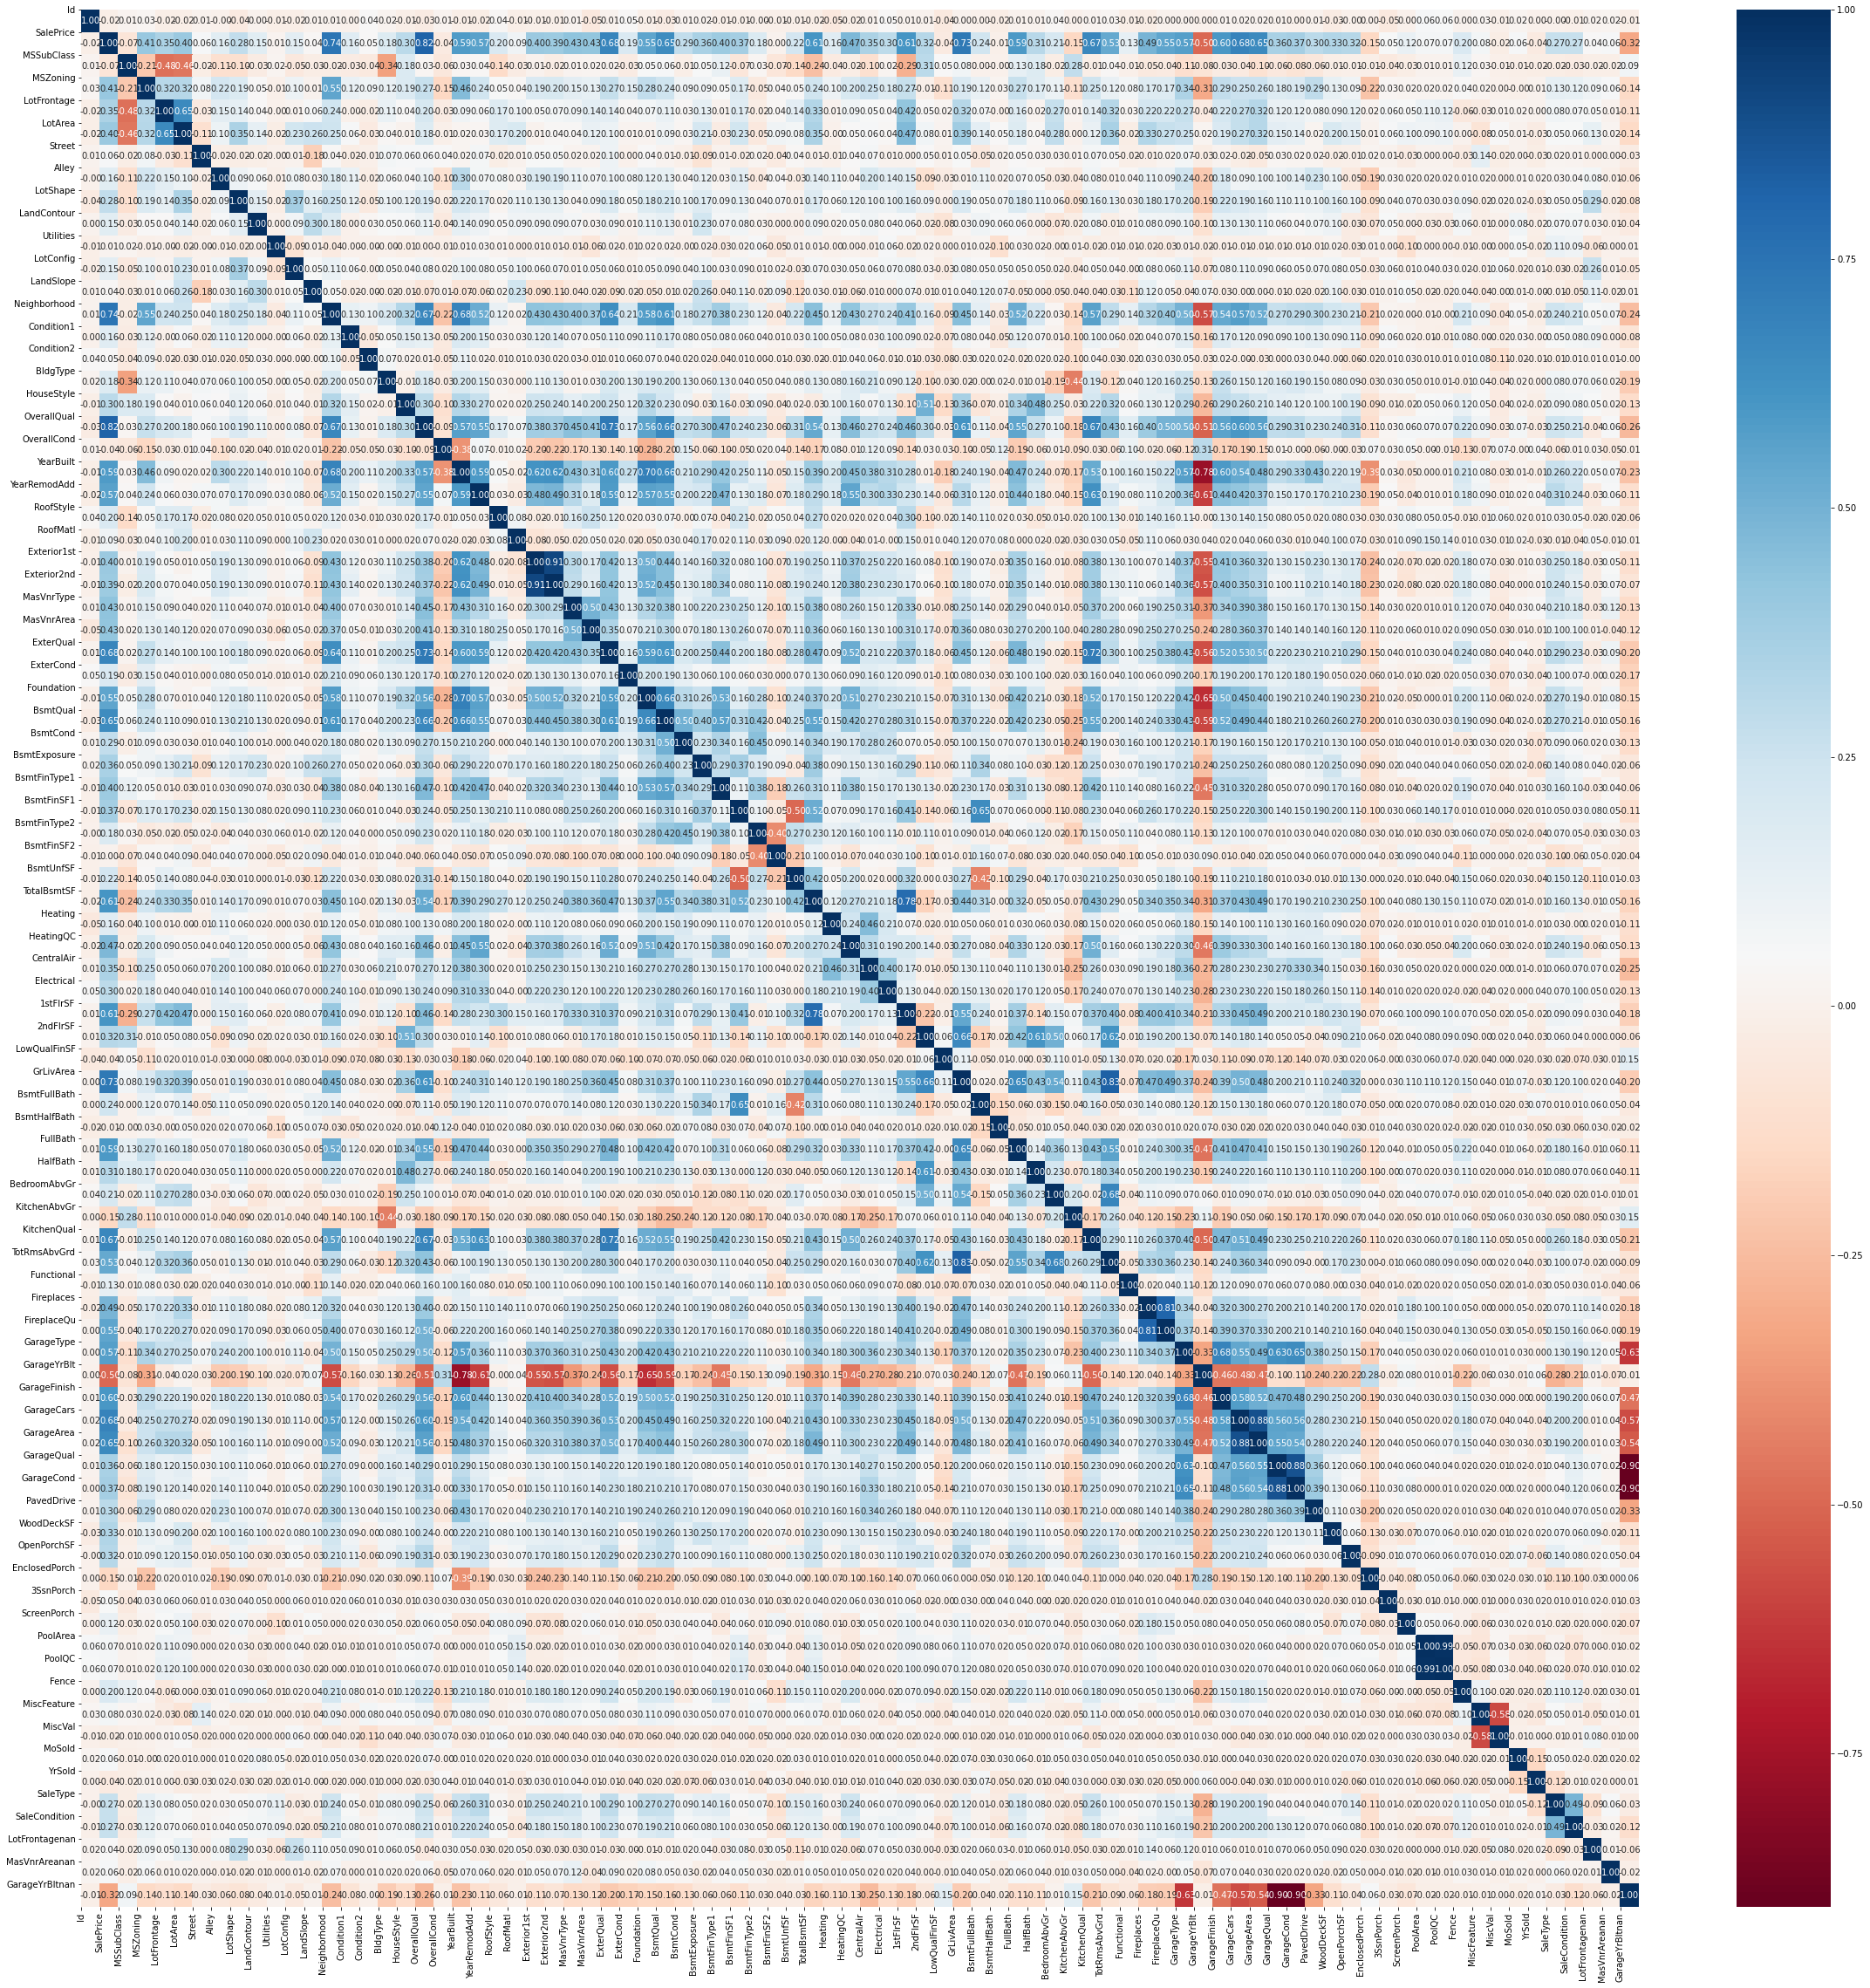

In [ ]:
# LEt's see correlation
corr = dff.corr()
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

1. Neighbourhood is correlated to saleprice to 0.74
2. Overall quality is correlated to sale price to 0.82
3. kitchen quality is correlated to sale price to 0.67
4. Garage area is correlated to sale price to 0.65
5. Utility is correlated to sale price to 0.01
6. Year Built is correlated to sale price to 0.59
7. Basement quality is correlated to sale price to 0.65
8. greater living area is correlated to sale price to 0.73

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
feature_select_model= SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_select_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_select_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [ ]:
# Now Let's print the total no of features and selected features that is actually significant
selected_feature= X.columns[(feature_select_model.get_support())]

# print the stats here
print('Total features: {}'.format((X.shape[1])))
print('Selected Features: {}'.format(len(selected_feature)))

Total features: 82
Selected Features: 21


So out of total 82 features we got only 21 feature of really valuable and will predict the house price using these features.

In [ ]:
selected_feature

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [ ]:
X=X[selected_feature]
X.head()

MSSubClass  MSZoning  Neighborhood  OverallQual  YearRemodAdd  RoofStyle  \
0    0.235294      0.75      0.636364     0.666667      0.883333        0.0   
1    0.000000      0.75      0.500000     0.555556      0.433333        0.0   
2    0.235294      0.75      0.636364     0.666667      0.866667        0.0   
3    0.294118      0.75      0.727273     0.666667      0.333333        0.0   
4    0.235294      0.75      1.000000     0.777778      0.833333        0.0   

   BsmtQual  BsmtExposure  HeatingQC  CentralAir  1stFlrSF  GrLivArea  \
0      0.75          0.25       1.00         1.0  0.356155   0.577712   
1      0.75          1.00       1.00         1.0  0.503056   0.470245   
2      0.75          0.50       1.00         1.0  0.383441   0.593095   
3      0.50          0.25       0.75         1.0  0.399941   0.579157   
4      0.75          0.75       1.00         1.0  0.466237   0.666523   

   BsmtFullBath  KitchenQual  Fireplaces  FireplaceQu  GarageType  \
0      0.333333     0.666667    0.000000          0.2         0.8   
1      0.000000     0.333333    0.333333          0.6         0.8   
2      0.333333     0.666667    0.333333          0.6         0.8   
3      0.333333     0.666667    0.333333          0.8         0.4   
4      0.333333     0.666667    0.333333          0.6         0.8   

   GarageFinish  GarageCars  PavedDrive  SaleCondition  
0      0.666667        0.50         1.0           0.75  
1      0.666667        0.50         1.0           0.75  
2      0.666667        0.50         1.0           0.75  
3      0.333333        0.75         1.0           0.00  
4      0.666667        0.75         1.0           0.75

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f"Shape of X_train: {X_train.shape}\nShape of X_test: {X_test.shape}\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}\n")

Shape of X_train: (1022, 21)
Shape of X_test: (438, 21)
Shape of y_train: (1022, 1)
Shape of y_test: (438, 1)



### Straightified Sampling

In [ ]:
#we will distribute the sample in test and train data so that no of zeros and ones could be same
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
split.get_n_splits(X, y)

1

### Model Prediction

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
l_reg=LinearRegression()
l_reg.fit(X,y)
y_prd=l_reg.predict(X)
r2l=r2_score(y, y_prd)

In [ ]:
# For Cross Validation Score
cv_l = cross_val_score(estimator = l_reg, X = X, y = y, cv = 10)
# The Test set results
rmse_l= (np.sqrt(mean_squared_error(y, y_prd)))
print('CV_mean: ', cv_l.mean())
print('CV_Std: ', cv_l.std())
print('R2_score: ', r2l)
print("RMSE: ", rmse_l)

CV_mean:  0.8808254139173265
CV_Std:  0.026756404125581553
R2_score:  0.8866517011696362
RMSE:  0.13443835136258508


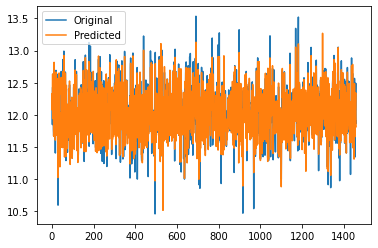

In [ ]:
plt.plot(y, Label="Original")
plt.plot(y_prd, label="Predicted")
plt.legend()
plt.show()

### Decision Tree

In [ ]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regression_dt = DecisionTreeRegressor(random_state = 0)
regression_dt.fit(X, y)
y_pred=regression_dt.predict(X)
r2_DT=r2_score(y, y_pred)

In [ ]:
# For Cross Validation Score
cv_DT = cross_val_score(estimator = regression_dt, X = X, y = y, cv = 10)
# The Test set results
rmse_DT = (np.sqrt(mean_squared_error(y, y_pred)))
print('CV_mean: ', cv_DT.mean())
print('CV_Std: ', cv_DT.std())
print('R2_score: ', r2_DT)
print("RMSE: ", rmse_DT)

CV_mean:  0.7663918032856426
CV_Std:  0.04435087613370758
R2_score:  0.9999416271852087
RMSE:  0.003050850964876756


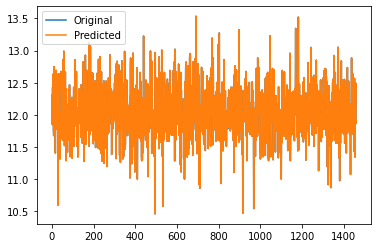

In [ ]:
plt.plot(y, Label="Original")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()

### Extra Tree Regressor

In [ ]:
from sklearn.tree import ExtraTreeRegressor
extratree_model=ExtraTreeRegressor(random_state=42)
extratree_model.fit(X,y)
y_predicte=extratree_model.predict(X)
r2_ET=r2_score(y,y_predict.ravel())

In [ ]:
# For Cross Validation Score
cv_ET = cross_val_score(estimator = extratree_model, X = X, y = y, cv = 10)
# The Test set results
rmse_ET = (np.sqrt(mean_squared_error(y, y_predicte)))
print('CV_mean: ', cv_ET.mean())
print('CV_Std: ', cv_ET.std())
print('R2_score: ', r2_ET)
print("RMSE: ", rmse_ET)

CV_mean:  0.7274849045317565
CV_Std:  0.044873345653425205
R2_score:  0.9833100500190305
RMSE:  0.003050822218008087


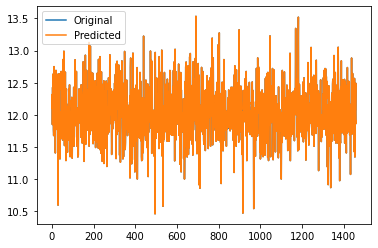

In [ ]:
plt.plot(y, Label="Original")
plt.plot(y_predicte, label="Predicted")
plt.legend()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=700,random_state=42)
rf_model.fit(X,y)
y_predict=rf_model.predict(X)
r2_RF=r2_score(y,y_predict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# For Cross Validation Score
cv_RF = cross_val_score(estimator = rf_model, X = X, y = y, cv = 10)
# The Test set results
rmse_RF = (np.sqrt(mean_squared_error(y, y_predict)))
print('CV_mean: ', cv_RF.mean())
print('CV_Std: ', cv_RF.std())
print('R2_score: ', r2_RF)
print("RMSE: ", rmse_RF)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

CV_mean:  0.876597208825682
CV_Std:  0.02271722656872158
R2_score:  0.9833100500190305
RMSE:  0.05158734682161952


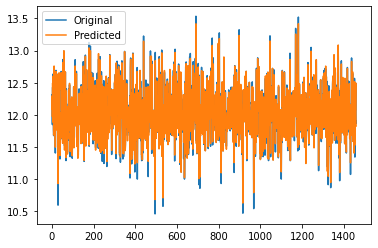

In [ ]:
plt.plot(y, Label="Original")
plt.plot(y_predict, label="Predicted")
plt.legend()
plt.show()

### Xgboost Regressor

In [ ]:
import xgboost as xgb
xgb_model= xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X, y)
yp=xgb_model.predict(X)
r2_XGB=r2_score(y, yp)

In [ ]:
# For Cross Validation Score
cv_XGB = cross_val_score(estimator = xgb_model, X = X, y = y, cv = 10)
# The Test set results
rmse_XGB = (np.sqrt(mean_squared_error(y, y_predicte)))
print('CV_mean: ', cv_XGB.mean())
print('CV_Std: ', cv_XGB.std())
print('R2_score: ', r2_XGB)
print("RMSE: ", rmse_XGB)

CV_mean:  0.8906274718340557
CV_Std:  0.017240497656436
R2_score:  0.9348550154902541
RMSE:  0.003050822218008087


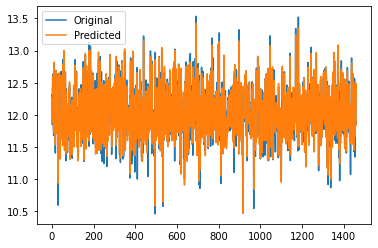

In [ ]:
plt.plot(y, Label="Original")
plt.plot(yp, label="Predicted")
plt.legend()
plt.show()

### Summery



```
# This is formatted as code
```

So finally we got the the best prediction for the Dataset. In this whole process we did Data Analysis in which i handled numerical, categorical, Continuous and Discrete variables. I face challenges in finding missing values and outliers in both categorical and numerical variables and then imputing appropriate value at missing place and after that finding rare variables and naming it. After this I did Feature Engineering, Feature Scaling and Feature Selection to choose only valuable features, For that i have used Lasso Technique. After i used Straightified Sampling to cross validate the data. Now For the model to choose early in data analysis we saw that data is almost linerar, so first i choose Linear Regression but this was not so good as it was having 88% accuracy.

*   CV_mean:  0.8808254139173265
*   CV_Std:  0.026756404125581553
*   R2_score:  0.8866517011696362
*   RMSE:  0.13443835136258508 

So i choose Decision Tree Regressor which was having a very good accuracy but the cross validation mean and standard deviation was not satisfying me.

*   CV_mean:  0.7663918032856426
*   CV_Std:  0.04435087613370758
*   R2_score:  0.9999416271852087
*   RMSE:  0.003050850964876756

After this i used Extra Tree Regressor which is you can say similar to decision tree but has little different way. This is almost same accuracy and RMSE but cross validation mean is very less.

*   CV_mean:  0.7274849045317565
*   CV_Std:  0.044873345653425205
*   R2_score:  0.9833100500190305
*   RMSE:  0.003050822218008087

So USed Random Forest because it is internally using Decision Tree with bagging.
and the score was little satisfying, because accuracy was good and crossvalidation mean and undigesting but other metrics cross validation standard deviation and RMSE score was good.

*   CV_mean:  0.876597208825682
*   CV_Std:  0.02271722656872158
*   R2_score:  0.9833100500190305
*   RMSE:  0.05158734682161952

Now I tried XGBoost as it uses Bagging and Boosting both. This is satisfying as this is having a good accuracy of 93% and cross validation mean is nearer to accuracy and cross validation standerd deviation which is call spread of the data is also least and the RMSE( Root mean squared error) is also very very less. So This is my final model to predict.

*   CV_mean:  0.8906274718340557
*   CV_Std:  0.017240497656436
*   R2_score:  0.9348550154902541
*   RMSE:  0.003050822218008087


For that if I will use Hyper parameter tuning this surely this will give a more better result. But due to system limitation i not doing here.